<a href="https://colab.research.google.com/github/dmika1234/dl_uwr/blob/develop/Assignments/Assignment2/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 2

**Submission deadlines:** 
- get at least 4 points by Tuesday, 30.03.2023
- remaining points: last lab session before or on Tuesday, 06.04.2023

**Points:** Aim to get 16 out of 20+ possible points

## Submission instructions
The class is held on-site in lab rooms. Please prepare you notebook on your computer or anywhere in the cloud (try using DeepNote or Google Colab (preferred since one can get free GPUs there)).
Make sure you know all the questions and asnwers, and that the notebook contains results; bfore presentation do `Runtime -> Restart and run all`
![Picture title](image-20220302-183151.png)

We provide starter code, however you are not required to use it as long as you properly solve the tasks.

As always, please submit corrections using GitHub's Pull Requests to https://github.com/rnoxy/dl_uwr.

# Problems


## Problem 1 [1p]:

Let's see why GPUs are useful in deep learning. Compare matrix multiplication speed for a few matrix shapes when implemented:
1. as loops in Python
2. using np.einsum
3. using numpy on CPU
4. using pytorch on CPU
5. using pytorch on GPU

Finally, consider two square matrices, $A$ and $B$. We have 4 possibilities of multiplying them or their transpositions:
1. $AB$
2. $A^TB$
3. $AB^T$
4. $A^TB^T$

Which option is the fastest? Why?

## Problem 2: Stochastic Gradient Descent [3p]

We provide below starter code that trains a softmax regression model. Alternatively, implement your own training loop and use it to solve this problem jointly with the next one.

Implement the following additions to the SGD code provided:
  1. **[1p]** momentum
  2. **[1p]** learning rate schedule
  3. **[1p]** weight decay, in which we additionally minimize for each weight matrix (but typically not the bias) the sum of its elements squared. One way to implement it is to use the function `model.named_parameters` and select all parameters whose names contain "`weight`" rather than "`bias`".

## Problem 3: Tuning the Network for MNIST [4p]

Tune the following network to reach **validation error rate below 1.9%**.
This should result in a **test error rate below 2%**. To
tune the network you will need to:
1. Choose the number of layers (more than 1, less than 5);
2. Choose the number of neurons in each layer (more than 100,
    less than 5000);
3. Pick proper weight initialization;
4. Pick proper learning rate schedule (need to decay over time,
    a good range to check on MNIST is about 1e-2 ... 1e-1 at the beginning and
    half of that after 10000 batches);
5. Pick a momentum constant (probably a constant one will be OK).


Please note: there are many hyperparameter settings that give the desired answer, some may require tuning all hyperparameters, some only a few.

## Problem 4: Convolutional Network [2p]

Use convolutional and max-pooling layers (`Conv2d`, `Max_pool2d` or their functional variants) and (without dropout) get a test error rate below 1.5%.

## Problem 5: Dropout [2p]

Learn about dropout:

- implement a **dropout** layer 
- or use `nn.Dropout` (then the exercise is worth 1.5 points)

and try to train a
network getting below 1.5% test error rates with dropout, but no convolutions, or below 1% when dropout is used jointly with convolutions!

Remember to turn off dropout during testing, using `model.train()` and `model.eval()`!

Hint: Use [torch.nn.functional.dropout](http://pytorch.org/docs/master/nn.html#torch.nn.functional.dropout).

Details: http://arxiv.org/pdf/1207.0580.pdf.

## Problem 6: Data Augmentation [1p]

Apply data augmentation methods (e.g. rotations, noise, crops) when training networks on MNIST, to significantly reduce test error rate for your network. You can use functions from the [torchvision.transforms](http://pytorch.org/docs/master/torchvision/transforms.html) module.

Please note: when using random transformations during training, make sure they are re-computed in every epoch. Consider applying augmentation either in the training loop or in the `InMemDataLoader`. For the second case, function `InMemDataLoader.__iter__` is a good place to do it.

## Problem 7: Batch Normalization [1p]

[Batch Normalization](https://arxiv.org/abs/1502.03167) helps training neural networks because it [normalizes layer activation magnitudes](https://papers.nips.cc/paper/7515-how-does-batch-normalization-help-optimization.pdf). It typically allows to train networks faster and/or with higher learning rates, lessens the importance
of initialization and might eliminate the need for Dropout.

Implement Batch Normalization and compare with regular training of MNIST models.

Remember to use the batch statistics during model training and to use an average of training batch statistics during model evaluation. For details please consult the paper.

## Problem 8: Norm Constraints [1p]

Implement norm constraints, i.e. instead of weight decay, that tries to set all weights to small values, apply a limit on the total
norm of connections incoming to a neuron. In our case, this
corresponds to clipping the norm of *rows* of weight
matrices. An easy way of implementing it is to make a gradient
step, then look at the norm of rows and scale down those that are
over the threshold (this technique is called "projected gradient descent").

Please consult the Dropout paper (http://arxiv.org/pdf/1207.0580.pdf) for details.

## Problem 9: Polyak Averaging [1p]

Implement Polyak averaging. For each parameter $\theta$
keep a separate, exponentially decayed average of the past values
$$
\bar{\theta}_n = \alpha_p\bar{\theta}_{n-1} + (1-\alpha_p)\theta_n.
$$
Use that average when evaluating the model on the test set.
Validate the approach by training a model on the MNIST dataset.

## Problem 10: Hyperparameter tuner [1p]

Implement a hyper-parameter tuner able to optimize the learning rate schedule, number of neurons, and similar hyperparameters. To start, use a random search (please see http://jmlr.csail.mit.edu/papers/volume13/bergstra12a/bergstra12a.pdf and especially Fig 1. for intuitions on why random search is better than grid search). It may be a good idea to use a fixed maximum number of epochs (or training time) for each optimization trial to prevent selecting hyperparameters that yield slowly converging solutions. A good result will be a set of hyperparameters that reach on MNIST solutions with test errors less than $1.3\%$ in no more than 50 epochs.

## Problem 11: Pruning [1p]

Prune the MNIST network to retain validation accuracy no worse than 0.1 percentage point at maximum sparsity (maximal number of weights removed from the network).

One way to do it is to 
1. train the network, 
2. set to zero the smallest weights (typically you can zero up to 50% of weights)
3. retrain the network, keeping the zeroed weights zeroed, and repeat

## Problem 12: Extreme Learning Machine (ELM) [2p]

Consider a neural network with 1 hidden layer. In the extreme learning approach, the first layer is not trained, but instead, it is randomly set. It is often very large. The second (output) layer weights can then be set using the closed-form formula for linear regression. Thus, training an ELM is fast (there is no iterative optimization) and one can try many different hyperparameters, such as hidden layer size, the random distribution from which weights are sampled, the hidden activation function, and so forth.

Task: Implement an ELM for MNIST and try to reach the performance of your backpropagation-trained model.

## Problem 13: Other tricks [1p-many]

The neural network literature is full of tricks for training neural networks. Find some and implement them. Please note: the number of points depends on the hardness of the extension you want to implement. If in doubt, consult the TA beforehand

# Starter code

The code below trains a SoftMax regression model in PyTorch. It can easily be extended into a full multilayer neural network.

In [1]:
%matplotlib inline

import os
import time


from IPython.display import clear_output
from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import numpy as np
from functools import partial
import random

import torch
import torch.nn.functional as F
import torchvision.datasets
from torch import nn

# Problem 1

In [62]:
A = np.random.normal(size=(500, 500))
B = np.random.normal(size=(500, 500))

In [63]:
%%time
# start = time.time()
result = [] # final result
for i in range(len(A)):

    row = [] # the new row in new matrix
    for j in range(len(B[0])):
        
        product = 0 # the new element in the new row
        for v in range(len(A[i])):
            product += A[i][v] * B[v][j]
        row.append(product) # append sum of product into the new row
        
    result.append(row) # append the new row into the final result
# stop = time.time()
# print(f'Time taken to multiply A and B: {stop - start}')

CPU times: total: 2min 20s
Wall time: 2min 20s


In [64]:
%%time
result = np.einsum('ij, jk ->ik', A, B)

CPU times: total: 62.5 ms
Wall time: 74.8 ms


In [65]:
%%time
result = np.dot(A, B)

CPU times: total: 0 ns
Wall time: 3.99 ms


In [66]:
A_t = torch.from_numpy(A)
B_t = torch.from_numpy(B)

In [67]:
%%time
result = torch.matmul(A_t, B_t)

CPU times: total: 0 ns
Wall time: 4.99 ms


In [68]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
A_t = A_t.to(device)
B_t = B_t.to(device)

In [69]:
%%time
result = torch.matmul(A_t, B_t)

CPU times: total: 0 ns
Wall time: 0 ns


In [70]:
%%time
result = np.dot(A, B)

CPU times: total: 0 ns
Wall time: 3.99 ms


In [71]:
%%time
result = np.dot(A.T, B)

CPU times: total: 93.8 ms
Wall time: 4.99 ms


In [72]:
%%time
result = np.dot(A.T, B.T)

CPU times: total: 0 ns
Wall time: 3.99 ms


In [58]:
%%time
result = np.dot(A, B.T)

CPU times: total: 0 ns
Wall time: 998 µs


In [2]:
def compute_error_rate(model, data_loader, device="cpu"):
    """Evaluate model on all samples from the data loader.
    """
    # Put the model in eval mode, and move to the evaluation device.
    model.eval()
    model.to(device)
    if isinstance(data_loader, InMemDataLoader):
        data_loader.to(device)

    num_errs = 0.0
    num_examples = 0
    # we don't need gradient during eval!
    with torch.no_grad():
        for x, y in data_loader:
            x = x.to(device)
            y = y.to(device)
            outputs = model.forward(x)
            _, predictions = outputs.data.max(dim=1)
            num_errs += (predictions != y.data).sum().item()
            num_examples += x.size(0)
    return num_errs / num_examples


def plot_history(history):
    """Helper to plot the trainig progress over time."""
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    train_loss = np.array(history["train_losses"])
    plt.semilogy(np.arange(train_loss.shape[0]), train_loss, label="batch train loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    train_errs = np.array(history["train_errs"])
    plt.plot(np.arange(train_errs.shape[0]), train_errs, label="batch train error rate")
    val_errs = np.array(history["val_errs"])
    plt.plot(val_errs[:, 0], val_errs[:, 1], label="validation error rate", color="r")
    plt.ylim(0, 0.20)
    plt.legend()

## Data loading

Training speed is important. By default, data is loaded on the CPU, then shipped in batches to the GPU. For this exercise, we will load the full dataset onto the GPU, which speeds up training.

In [3]:
class InMemDataLoader(object):
    """
    A data loader that keeps all data in CPU or GPU memory.
    """

    __initialized = False

    def __init__(
        self,
        dataset,
        batch_size=1,
        shuffle=False,
        sampler=None,
        batch_sampler=None,
        drop_last=False,
    ):
        """A torch dataloader that fetches data from memory."""
        batches = []
        for i in tqdm(range(len(dataset))):
            batch = [torch.tensor(t) for t in dataset[i]]
            batches.append(batch)
        tensors = [torch.stack(ts) for ts in zip(*batches)]
        dataset = torch.utils.data.TensorDataset(*tensors)
        self.dataset = dataset
        self.batch_size = batch_size
        self.drop_last = drop_last

        if batch_sampler is not None:
            if batch_size > 1 or shuffle or sampler is not None or drop_last:
                raise ValueError(
                    "batch_sampler option is mutually exclusive "
                    "with batch_size, shuffle, sampler, and "
                    "drop_last"
                )
            self.batch_size = None
            self.drop_last = None

        if sampler is not None and shuffle:
            raise ValueError("sampler option is mutually exclusive with " "shuffle")

        if batch_sampler is None:
            if sampler is None:
                if shuffle:
                    sampler = torch.utils.data.RandomSampler(dataset)
                else:
                    sampler = torch.utils.data.SequentialSampler(dataset)
            batch_sampler = torch.utils.data.BatchSampler(
                sampler, batch_size, drop_last
            )

        self.sampler = sampler
        self.batch_sampler = batch_sampler
        self.__initialized = True

    def __setattr__(self, attr, val):
        if self.__initialized and attr in ("batch_size", "sampler", "drop_last"):
            raise ValueError(
                "{} attribute should not be set after {} is "
                "initialized".format(attr, self.__class__.__name__)
            )

        super(InMemDataLoader, self).__setattr__(attr, val)

    def __iter__(self):
        for batch_indices in self.batch_sampler:
            yield self.dataset[batch_indices]

    def __len__(self):
        return len(self.batch_sampler)

    def to(self, device):
        self.dataset.tensors = tuple(t.to(device) for t in self.dataset.tensors)
        return self

In [4]:
# Load the data

batch_size = 128
data_path = "./data"

transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

_test = torchvision.datasets.MNIST(
    data_path, train=False, download=True, transform=transform
)

# Load training data, split into train and valid sets
_train = torchvision.datasets.MNIST(
    data_path, train=True, download=True, transform=transform
)
_train.data = _train.data[:50000]
_train.targets = _train.targets[:50000]

_valid = torchvision.datasets.MNIST(
    data_path, train=True, download=True, transform=transform
)
_valid.data = _valid.data[50000:]
_valid.targets = _valid.targets[50000:]

mnist_loaders = {
    "train": InMemDataLoader(_train, batch_size=batch_size, shuffle=True),
    "valid": InMemDataLoader(_valid, batch_size=batch_size, shuffle=False),
    "test": InMemDataLoader(_test, batch_size=batch_size, shuffle=False),
}

  0%|          | 0/50000 [00:00<?, ?it/s]

C:\Users\dmika\AppData\Local\Temp\ipykernel_6348\2199848925.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = [torch.tensor(t) for t in dataset[i]]


  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

## SGD implementation

We provide below a scaffolding for SGD. You will need to fill the TODOs while solving the assignments.

In [6]:
def SGD(
        model,
        data_loaders,
        alpha=1e-4,
        epsilon=0.0,
        lr_schedule=(None, None),
        decay=0.0,
        num_epochs=1,
        max_num_epochs=np.nan,
        train_transform=None,
        norm_threshold=np.inf,
        pruned=False,
        patience_expansion=1.5,
        log_every=100,
        device="cpu",
        verbose=False,
        full_silent=False
):
    alpha0 = alpha
    lr_schedule, lr_schedule_type = lr_schedule
    # Put the model in train mode, and move to the evaluation device.
    model.train()
    model.to(device)
    for data_loader in data_loaders.values():
        if isinstance(data_loader, InMemDataLoader):
            data_loader.to(device)

    #
    # TODO for Problem 1.3: Initialize momentum variables
    # Hint: You need one velocity matrix for each parameter
    velocities = [torch.zeros_like(p) for p in model.parameters()]
    #
    iter_ = 0
    epoch = 0
    best_params = None
    best_val_err = np.inf
    history = {"train_losses": [], "train_errs": [], "val_errs": []}
    if not full_silent:
        print("Training the model!")
        print("Interrupt at any time to evaluate the best validation model so far.")
    try:
        tstart = time.time()
        siter = iter_
        while epoch < num_epochs:
            model.train()
            epoch += 1
            if epoch > max_num_epochs:
                break
            #
            # TODO: You can implement learning rate control here (it is updated
            # once per epoch), or below in the loop over minibatches.
            if lr_schedule_type == "epochs":
                alpha = lr_schedule(alpha0, epoch)

            for x, y in data_loaders["train"]:
                if train_transform:
                    x = train_transform(x)
                x = x.to(device)
                y = y.to(device)
                iter_ += 1
                # This calls the `forward` function: https://pytorch.org/tutorials/beginner/examples_nn/two_layer_net_module.html
                out = model(x)
                loss = model.loss(out, y)
                loss.backward()
                _, predictions = out.max(dim=1)
                batch_err_rate = (predictions != y).sum().item() / out.size(0)

                history["train_losses"].append(loss.item())
                history["train_errs"].append(batch_err_rate)

                # disable gradient computations - we do not want torch to
                # backpropagate through the gradient application!
                with torch.no_grad():
                    for (name, p), v in zip(model.named_parameters(), velocities):
                        # Fro prunning
                        if pruned:
                            zero_mask = p == 0

                        if "weight" in name:
                            #
                            # TODO for Problem 1.3: Implement weight decay (L2 regularization
                            # on weights by changing the gradients
                            p.grad += decay * p


                        #
                        # TODO for Problem 1.2: Implement a learning rate schedule
                        # Hint: You can use the iteration or epoch counters
                        if lr_schedule_type == "batch_iters":
                            alpha = lr_schedule(alpha0, iter_)

                        #
                        # TODO for Problem 1.1: If needed, implement here a momentum schedule
                        # epsilon = TODO
                        #

                        #
                        # TODO for Problem 1.1: Implement velocity updates for momentum
                        # lease make sure to modify the contents of v, not the v pointer!!!
                        param_grad = epsilon * v + (1-epsilon) * p.grad
                        v[...] = param_grad

                        #
                        # TODO for Problem 1: Set a more sensible learning rule here,
                        #       using your learning rate schedule and momentum
                        p -= alpha * v

                        # Norm Constraint:
                        if "weight" in name:
                            row_norms = torch.norm(p, p=2, dim=1)
                            mask = row_norms >= norm_threshold
                            scaled_rows = p[mask] / row_norms[mask, None]
                            scaled_rows *= norm_threshold
                            p[mask] = scaled_rows

                        if pruned:
                            p *= zero_mask.float()
                        # Zero gradients for the next iteration
                        p.grad.zero_()

                if iter_ % log_every == 0 and verbose:
                    num_iter = iter_ - siter + 1
                    print(
                        "Minibatch {0: >6}  | loss {1: >5.2f} | err rate {2: >5.2f}%, steps/s {3: >5.2f}".format(
                            iter_,
                            loss.item(),
                            batch_err_rate * 100.0,
                            num_iter / (time.time() - tstart),
                        )
                    )
                    tstart = time.time()

            val_err_rate = compute_error_rate(model, data_loaders["valid"], device)
            history["val_errs"].append((iter_, val_err_rate))

            if val_err_rate < best_val_err:
                # Adjust num of epochs
                num_epochs = int(np.maximum(num_epochs, epoch * patience_expansion + 1))
                best_epoch = epoch
                best_val_err = val_err_rate
                best_params = [p.detach().cpu() for p in model.parameters()]
            clear_output(True)
            os.system('cls')
            m = "After epoch {0: >2} | valid err rate: {1: >5.2f}% | doing {2: >3} epochs".format(
                epoch, val_err_rate * 100.0, num_epochs
            )
            if not full_silent:
                print("{0}\n{1}\n{0}".format("-" * len(m), m))

    except KeyboardInterrupt:
        pass

    if best_params is not None:
        if not full_silent:
            print("\nLoading best params on validation set (epoch %d)\n" % (best_epoch))
        with torch.no_grad():
            for param, best_param in zip(model.parameters(), best_params):
                param[...] = best_param
    if not full_silent:            
        plot_history(history)
    return val_err_rate

class Model(nn.Module):
    def __init__(self, *args, **kwargs):
        super(Model, self).__init__()
        self.layers = nn.Sequential(*args, **kwargs)

    def init_params_norm(self, mean=0, sd=0.5):
        with torch.no_grad():
            # Initialize parameters
            for name, p in self.named_parameters():
                if "weight" in name:
                    p.normal_(mean, sd)
                elif "bias" in name:
                    p.zero_()
                else:
                    raise ValueError('Unknown parameter name "%s"' % name)
    
    def init_params_xavier(self, gain=np.sqrt(2)):
        with torch.no_grad():
            # Initialize parameters
            for name, p in self.named_parameters():
                if "weight" in name:
                    nn.init.xavier_uniform_(p, gain=gain)
                elif "bias" in name:
                    nn.init.zeros_(p)

    def forward(self, X):
        X = X.view(X.size(0), -1)
        return self.layers.forward(X)

    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)


# Rate schedule
def exp_schedule(alpha0, iter, beta=0.9, warmups=5):
    if iter <= warmups:
        alpha = iter * alpha0
    elif iter > warmups:
        alpha = alpha0 * beta ** (iter - warmups)
    return alpha


def div_schedule(alpha0, iter, threshold=10):
    if iter > threshold:
        alpha = alpha0 / 2
    else: 
        alpha = alpha0
    return alpha


def div_schedule2(alpha0, iter, threshold=10):
  exp = np.floor(( iter - threshold) / threshold + 1)
  alpha = alpha0 / (2 ** exp)
  return alpha

def train_model(model, mnist_loaders, alpha, epsilon, lr_schedule, decay,
                 max_num_epochs, train_transform=None, norm_threshold=np.inf, pruned=False, device='cpu'):
    t_start = time.time()
    val_err = SGD(model, mnist_loaders, alpha=alpha, epsilon=epsilon, lr_schedule=lr_schedule,
                   decay=decay, max_num_epochs=max_num_epochs, train_transform=train_transform,
                     norm_threshold=norm_threshold, pruned=pruned, device=device)
    test_err_rate = compute_error_rate(model, mnist_loaders["test"])
    m = (
        f"Test error rate: {test_err_rate * 100.0:.3f}%, "
        f"training took {time.time() - t_start:.0f}s."
    )
    print("{0}\n{1}\n{0}".format("-" * len(m), m))
    return val_err

In [ ]:
# On GPU enabled devices set device='cuda' else set device='cpu'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

## Problem 2

Implemented in SGD function

In [7]:
model = Model(nn.Linear(28 * 28, 10))

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            p.normal_(0, 0.5)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device='cpu')


test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

----------------------------------------------------------
After epoch 30 | valid err rate:  8.63% | doing  46 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 30)

------------------------------------------
Test error rate: 9.150%, training took 9s.
------------------------------------------


: 

: 

## Problem 3

In [ ]:
alpha = 0.25
epsilon = 0.9
decay=0.0
max_num_epochs = 30
hidden_neurons = 800
gain = 0.1
lr_schedule = (partial(div_schedule2, threshold=10), "epochs")

torch.manual_seed(2137)
model = Model(nn.Linear(28 * 28, hidden_neurons),
              nn.ReLU(),
              nn.Linear(hidden_neurons, hidden_neurons),
              nn.ReLU(),
              nn.Linear(hidden_neurons, 10))
model.init_params_xavier(gain=gain)

In [ ]:
train_model(model, mnist_loaders, alpha, epsilon, lr_schedule, decay, max_num_epochs,
             train_transform=None, device=device)

## Problem 4

In [ ]:
alpha = 0.25
epsilon = 0.9
decay=0.0
max_num_epochs = 30
hidden_neurons = 800
gain = 0.1
lr_schedule = (partial(div_schedule2, threshold=10), "epochs")

torch.manual_seed(2023)
model = Model(nn.Unflatten(-1, (1, 28, 28)),
              nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
              nn.ReLU(),
              nn.MaxPool2d(kernel_size=2, stride=2),
              nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
              nn.ReLU(),
              nn.MaxPool2d(kernel_size=2, stride=2),
              nn.Flatten(),
              nn.Linear(64*7*7, 64*7*7),
              nn.ReLU(),
              nn.Linear(64*7*7, 10))
model.init_params_xavier(gain=gain)

In [ ]:
train_model(model, mnist_loaders, alpha, epsilon, lr_schedule, decay, max_num_epochs,
             train_transform=None, device=device)

## Problem 5

In [ ]:
class Dropout(torch.nn.Module):
    def __init__(self, dropout_prob):
        super(Dropout, self).__init__()
        self.dropout_prob = dropout_prob

    def forward(self, x):
        if not self.training:
            return x
        mask = torch.rand(x.shape) > self.dropout_prob
        mask = mask.float().to(x.device)
        x = x * mask / (1 - self.dropout_prob)
        return x

In [ ]:
alpha = 0.25
epsilon = 0.9
decay=0.0
max_num_epochs = 30
hidden_neurons = 800
gain = 0.1
lr_schedule = (partial(div_schedule2, threshold=10), "epochs")

torch.manual_seed(2023)
model = Model(nn.Linear(28 * 28, hidden_neurons),
              nn.ReLU(),
              nn.Linear(hidden_neurons, hidden_neurons),
              Dropout(0.66),
              nn.ReLU(),
              nn.Linear(hidden_neurons, 10))
model.init_params_xavier(gain=gain)

In [ ]:
train_model(model, mnist_loaders, alpha, epsilon, lr_schedule, decay, max_num_epochs,
             train_transform=None, device=device)

## Problem 6

In [ ]:
alpha = 0.25
epsilon = 0.9
decay=0.0
max_num_epochs = 30
hidden_neurons = 800
gain = 0.1
lr_schedule = (partial(div_schedule2, threshold=10), "epochs")

torch.manual_seed(2023)
model = Model(nn.Linear(28 * 28, hidden_neurons),
              nn.ReLU(),
              nn.Linear(hidden_neurons, hidden_neurons),
              nn.ReLU(),
              nn.Linear(hidden_neurons, 10))
model.init_params_xavier(gain=gain)

transforms_train = torchvision.transforms.Compose([
    torchvision.transforms.RandomAffine(degrees=15, translate=(0.1, 0.1)),
    torchvision.transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    torchvision.transforms.Normalize((0.1307,), (0.3081,))
])

In [ ]:
train_model(model, mnist_loaders, alpha, epsilon, lr_schedule, decay, max_num_epochs,
             train_transform=transforms_train, device=device)

## Problem 7

In [ ]:
class BatchNorm(nn.Module):
    def __init__(self, num_features, eps=1e-5, momentum=0.1):
        super().__init__()
        self.num_features = num_features
        self.eps = eps
        self.momentum = momentum
        
        self.gamma = nn.Parameter(torch.ones(num_features))
        self.beta = nn.Parameter(torch.zeros(num_features))
        self.register_buffer('running_mean', torch.zeros(num_features))
        self.register_buffer('running_var', torch.ones(num_features))
        
    def forward(self, x):
        if self.training:
            # Compute the mean and variance along each channel
            mean = x.mean(dim=0)
            var = x.var(dim=0, unbiased=False)
        
            self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * mean
            self.running_var = (1 - self.momentum) * self.running_var + self.momentum * var

            x_hat = (x - mean) / torch.sqrt(var + self.eps)
            y = self.gamma * x_hat + self.beta
            
        else:
            x_hat = (x - self.running_mean) / torch.sqrt(self.running_var + self.eps)
            y = self.gamma * x_hat + self.beta
        
        return y

In [ ]:
alpha = 0.25
epsilon = 0.9
decay=0.0
max_num_epochs = 30
hidden_neurons = 800
gain = 0.1
lr_schedule = (partial(div_schedule2, threshold=10), "epochs")

torch.manual_seed(2137)
model = Model(nn.Linear(28 * 28, hidden_neurons),
              nn.ReLU(),
              nn.Linear(hidden_neurons, hidden_neurons),
              BatchNorm(hidden_neurons),
              nn.ReLU(),
              nn.Linear(hidden_neurons, 10))
model.init_params_xavier(gain=gain)

In [ ]:
train_model(model, mnist_loaders, alpha, epsilon, lr_schedule, decay, max_num_epochs,
             train_transform=None, device=device)

## Problem 8

Implemented in SGD

In [ ]:
alpha = 0.25
epsilon = 0.9
decay=0.0
max_num_epochs = 30
hidden_neurons = 800
gain = 0.1
norm_threshold = 5
lr_schedule = (partial(div_schedule2, threshold=12), "epochs")

torch.manual_seed(2023)
model = Model(nn.Linear(28 * 28, hidden_neurons),
              nn.ReLU(),
              nn.Linear(hidden_neurons, hidden_neurons),
              nn.ReLU(),
              nn.Linear(hidden_neurons, 10))
model.init_params_xavier(gain=gain)

In [ ]:
train_model(model, mnist_loaders, alpha, epsilon, lr_schedule, decay, max_num_epochs,
             train_transform=None, device=device, norm_threshold=norm_threshold)

## Problem 10

In [ ]:
def hyperparameter_tuner(hyperparams, max_epochs=30, num_trials=100, loaders=None, device='cpu'):
  # Initialize the best validation accuracy and hyperparameters
  best_val_err = 1
  best_hyperparams = None

  # Perform random search
  for i in tqdm(range(num_trials)):
    # Randomly sample hyperparameters
    hyperparam_sample = {k: random.choice(v) for k, v in hyperparams.items()}
    
    # Train the model with the sampled hyperparameters
    model = Model(nn.Linear(28 * 28, hyperparam_sample['num_neurons']),
            nn.ReLU(),
            nn.Linear(hyperparam_sample['num_neurons'], hyperparam_sample['num_neurons']),
            nn.ReLU(),
            nn.Linear(hyperparam_sample['num_neurons'], 10))
    model.init_params_xavier(gain=hyperparam_sample['gain'])
    val_err = SGD(model, loaders, alpha=hyperparam_sample['lr'], epsilon=hyperparam_sample['momentum'], lr_schedule=hyperparam_sample['lr_schedule'],
                  decay=hyperparam_sample['decay'], max_num_epochs=max_epochs,
                    norm_threshold=hyperparam_sample['norm_threshold'], device=device, full_silent=True)

      
      # Record the hyperparameters if they gave the best validation accuracy so far
    if val_err < best_val_err:
        best_val_err = val_err
        best_hyperparams = hyperparam_sample
    
    print(f'Trial {i+1} obtained: val_err={100 * val_err:.2f}%, best_val_err={100 * best_val_err:.2f}%')
  return best_val_err, best_hyperparams

In [ ]:
# Define the hyperparameter space
hyperparams = {
    'lr': [0.5, 0.3, 0.25, 0.2, 1e-1, 1e-3, 1e-4],
    'lr_schedule': [(partial(div_schedule2, threshold=12), "epochs"), (partial(div_schedule2, threshold=4), "epochs"),
                    (partial(div_schedule2, threshold=16), "epochs"), (partial(exp_schedule, beta=0.9, warmups=3), "epochs"),
                    (partial(exp_schedule, beta=0.95, warmups=15), "epochs"), (partial(exp_schedule, beta=0.5, warmups=6), "epochs")],
    'momentum': [0.9, 0.95, 0.99],
    'decay': [1, 0.5, 0.1, 1e-2, 1e-3, 0.0],
    'norm_threshold': [10, 5, 1, 0.5, 0.1],
    'num_neurons': [64, 128, 256, 512, 800, 2000],
    'gain': [np.sqrt(2), np.sqrt(3), 1, 2, 0.5, 0.1, 0.01]
}

In [ ]:
# Runs looong
best_val_err, best_hyperparams = hyperparameter_tuner(hyperparams, max_epochs=30, num_trials=5, loaders=mnist_loaders, device=device)

In [ ]:
best_val_err, best_hyperparams

## Problem 11

In [ ]:
import copy 

def prune_model(model, prune_perc):
    pruned_model = copy.deepcopy(model)
    for name, module in pruned_model.named_modules():
        if isinstance(module, nn.Linear):
            with torch.no_grad():
                qt = torch.quantile(torch.abs(module.weight.data), prune_perc)
                mask = torch.abs(module.weight.data) < qt
                module.weight.data *= mask.float()
                if module.bias is not None:
                    module.bias.data *= mask[:, 0].float()
    return pruned_model

In [ ]:
alpha = 0.25
epsilon = 0.9
decay=0.0
max_num_epochs = 10
hidden_neurons = 800
gain = 0.1
norm_threshold = 5
lr_schedule = (partial(div_schedule2, threshold=12), "epochs")

torch.manual_seed(2023)
model = Model(nn.Linear(28 * 28, hidden_neurons),
              nn.ReLU(),
              nn.Linear(hidden_neurons, hidden_neurons),
              nn.ReLU(),
              nn.Linear(hidden_neurons, 10))
model.init_params_xavier(gain=gain)

----------------------------------------------------------
After epoch 10 | valid err rate:  1.65% | doing  16 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 10)

-------------------------------------------
Test error rate: 1.630%, training took 13s.
-------------------------------------------


0.0165

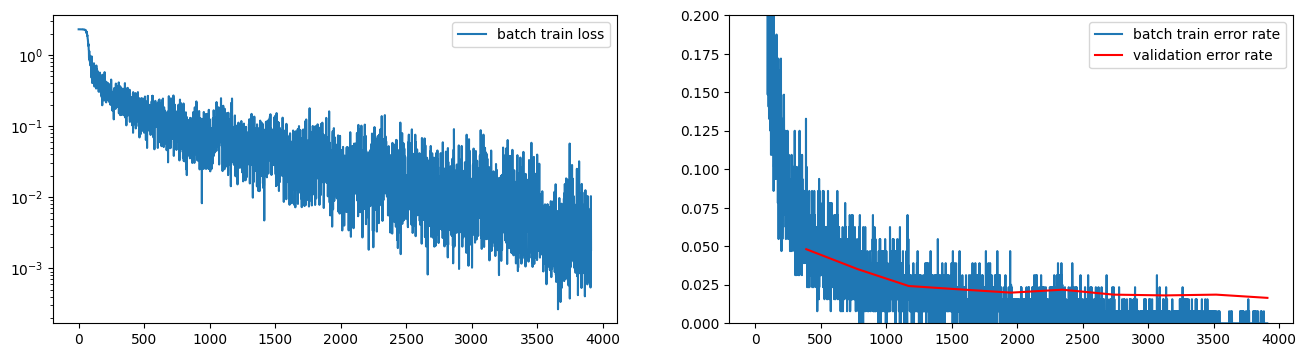

In [ ]:
train_model(model, mnist_loaders, alpha, epsilon, lr_schedule, decay, max_num_epochs, train_transform=None, device=device, norm_threshold=norm_threshold)

In [ ]:
model = prune_model(model, prune_perc=0.2)

----------------------------------------------------------
After epoch 20 | valid err rate:  1.67% | doing  29 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 19)

-------------------------------------------
Test error rate: 1.690%, training took 24s.
-------------------------------------------


0.0167

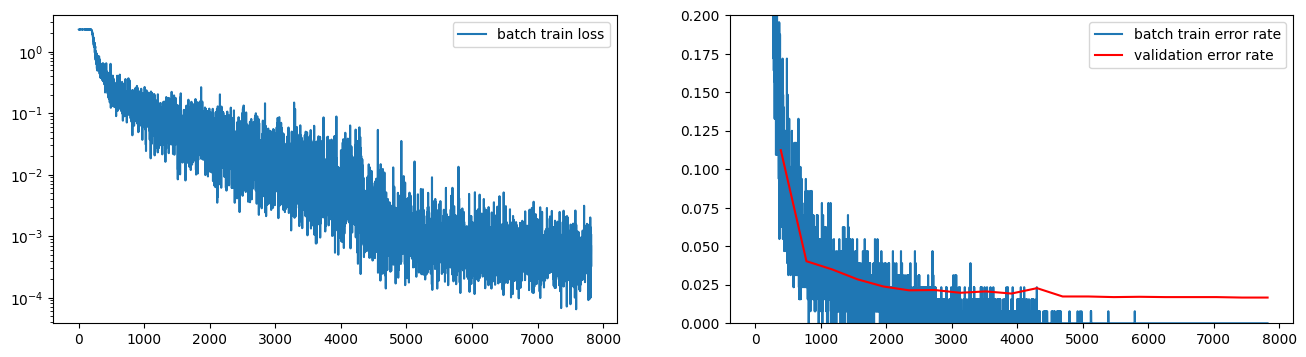

In [ ]:
train_model(model, mnist_loaders, alpha, epsilon, lr_schedule, decay, max_num_epochs+10, train_transform=None, device=device, norm_threshold=norm_threshold, pruned=False)

## Problem 12

In [ ]:
class ELM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights = torch.randn(input_size, hidden_size, requires_grad=False)
        self.biases = torch.randn(hidden_size, requires_grad=False)
        self.output_weights = torch.randn(hidden_size, output_size, requires_grad=False)
        self.init_params_xavier()

    def forward(self, x):
        x = x.view(x.size(0), -1).float()
        hidden = x @ self.weights + self.biases
        output = hidden @ self.output_weights
        return output
    
    def calculate_output_weights(self, x, y):
        x = x.view(x.size(0), -1).float()
        y = y.float()
        hidden = x @ self.weights + self.biases
        xtx = torch.matmul(hidden.t(), hidden)
        self.output_weights[...] = (torch.inverse(xtx) @ hidden.t() @ y).view(self.hidden_size, self.output_size)

    def init_params_xavier(self, gain=np.sqrt(2)):
        with torch.no_grad():
          nn.init.xavier_uniform_(self.weights, gain=gain)
          nn.init.zeros_(self.biases)

In [ ]:
# define transform to normalize data
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                torchvision.transforms.Normalize((0.5,), (0.5,)),
                              ])

# load training and test data
train_data = torchvision.datasets.MNIST(data_path, download=True, train=True, transform=transform)
test_data = torchvision.datasets.MNIST(data_path, download=True, train=False, transform=transform)

In [ ]:
X_train, y_train = train_data.data.float(), train_data.targets.float()
X_test, y_test = test_data.data.float(), test_data.targets.float()

In [ ]:
elm = ELM(28*28, 100, 1)
elm.calculate_output_weights(X_train, y_train)

In [ ]:
pred = elm.forward(X_test)
pred_fin = torch.round(pred).view(pred.size(0))
err = torch.sum(pred_fin != y_test).item() / y_test.size(0)
err